<a href="https://colab.research.google.com/github/haikaltech09/Bike-Sales-Data-of-100k/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Steps.

In [87]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# Read Dataset
df = pd.read_csv('/content/drive/My Drive/Dataset/Project3/bike_sales.csv')
df.head()

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female


# 1. Total bike sold

In [90]:
# Total bike sold 2020-2024
bike_sold = df['Quantity'].sum()
print(f'Total Bike Sold: {bike_sold} Units')

Total Bike Sold: 299711 Units


In [91]:
# Highest sales by bike model 2020-2024
bike_model_sold = df.groupby('Bike_Model')['Quantity'].sum()
bike_model_sold

,Quantity
Bike_Model,
BMX,43080
Cruiser,43120
Electric Bike,42249
Folding Bike,42872
Hybrid Bike,43089
Mountain Bike,42279
Road Bike,43022


In [92]:
# Highest sales by store location 2020-2024
Loc_bike_sold = df.groupby('Store_Location')['Quantity'].sum()
Loc_bike_sold

,Quantity
Store_Location,
Chicago,42614
Houston,42607
Los Angeles,42492
New York,43688
Philadelphia,42698
Phoenix,42901
San Antonio,42711


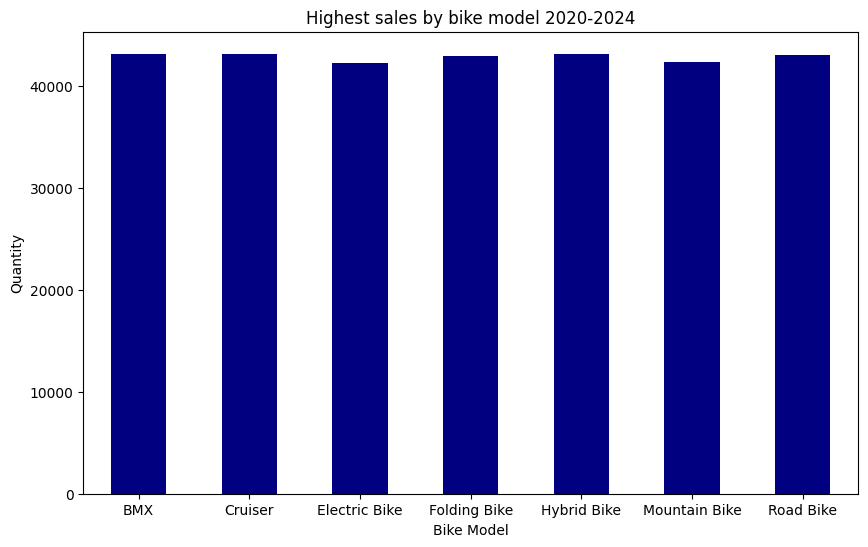

In [93]:
plt.figure(figsize=(10, 6))
bike_model_sold.plot(kind='bar', color='navy')
plt.title('Highest sales by bike model 2020-2024')
plt.ylabel('Quantity')
plt.xlabel('Bike Model')
plt.xticks(rotation=0)
plt.show()

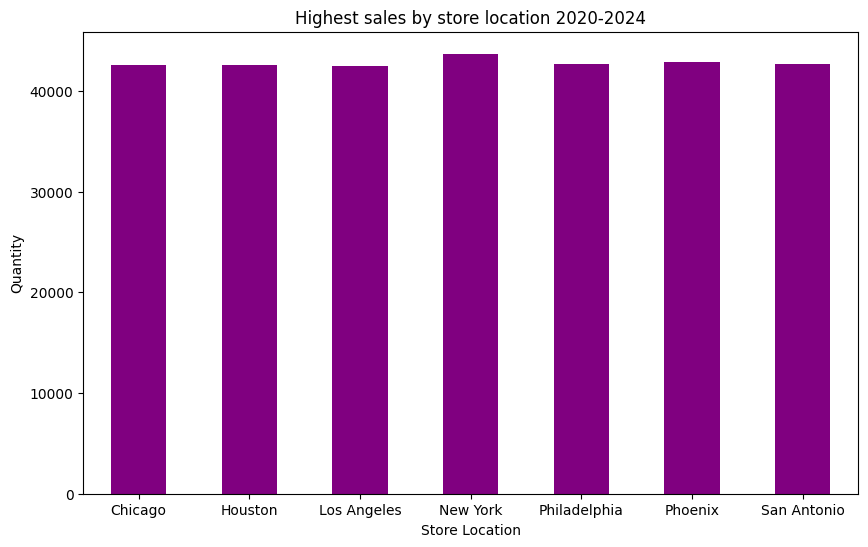

In [94]:
plt.figure(figsize=(10, 6))
Loc_bike_sold.plot(kind='bar', color='purple')
plt.title('Highest sales by store location 2020-2024')
plt.ylabel('Quantity')
plt.xlabel('Store Location')
plt.xticks(rotation=0)
plt.show()

# 2. Total Revenue

In [95]:
df['Date'] = pd.to_datetime(df.Date, format='%d-%m-%Y') # specify the correct format for day-month-year
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

df.head()

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender,Year,Month,Day
0,1,2022-07-11,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female,2022,7,11
1,2,2024-05-03,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male,2024,5,3
2,3,2022-09-01,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female,2022,9,1
3,4,2022-09-28,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male,2022,9,28
4,5,2021-01-05,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female,2021,1,5


In [96]:
df['Year'].value_counts()

,count
Year,
2022,21255
2020,21191
2023,21145
2021,20942
2024,15467


In [97]:
df['Month'].value_counts()

,count
Month,
7,9007
8,8996
5,8988
3,8982
1,8875
6,8713
4,8686
9,8276
2,8134


In [98]:
sum_month = df.groupby('Month')['Price'].sum()
sum_month

,Price
Month,
1,22871688.92
2,21061105.53
3,23301766.39
4,22799439.05
5,23349686.93
6,22626300.03
7,23394425.72
8,23261437.45
9,21528965.05


In [99]:
highest_value = sum_month.nlargest(3) # use nlargest to get the top 3 values from the Series
highest_value

,Price
Month,
7,23394425.72
5,23349686.93
3,23301766.39


In [100]:
sum_year = df.groupby('Year')['Price'].sum()
sum_year

,Price
Year,
2020,54988137.76
2021,54314629.00
2022,55466655.07
2023,54928856.44
2024,40119955.69


In [101]:
highest_value_year = sum_year.nlargest(4) # use nlargest to get the top 4 values from the Series
highest_value_year

,Price
Year,
2022,55466655.07
2020,54988137.76
2023,54928856.44
2021,54314629.00


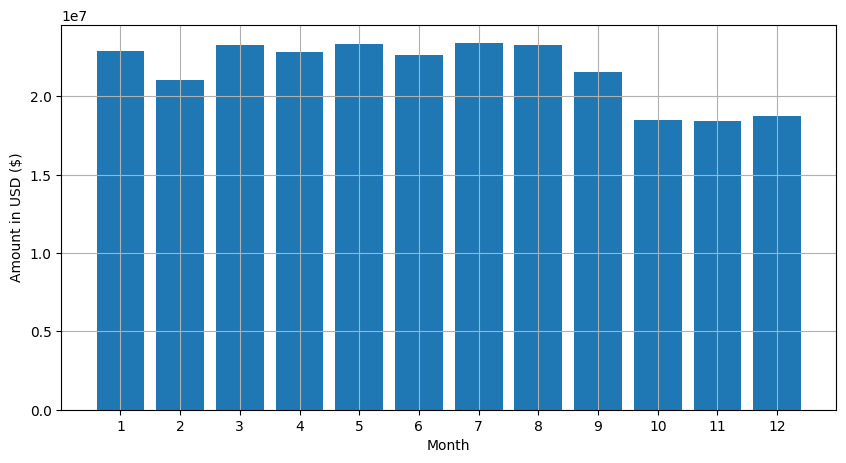

In [102]:
month = [Month for Month, df in df.groupby('Month')]
plt.figure(figsize=(10,5))
plt.bar(month, sum_month)
plt.xticks(month)
plt.ylabel('Amount in USD ($)')
plt.xlabel('Month')
plt.grid()
plt.show()

**The highest sales occurred in July, with a total revenue of 23,394,426 USD, followed by May with a revenue of 23,349,687 USD, and March with 23,301,766 USD. From January to August, the revenue remained stable with only slight declines, but entering September to October, there was a significant drop.**

**This result refers to the sales figures from 2020 to 2024, where in 2024, data is only available up to October, and this dataset was created at the end of September. That is why a significant drop has occurred.**

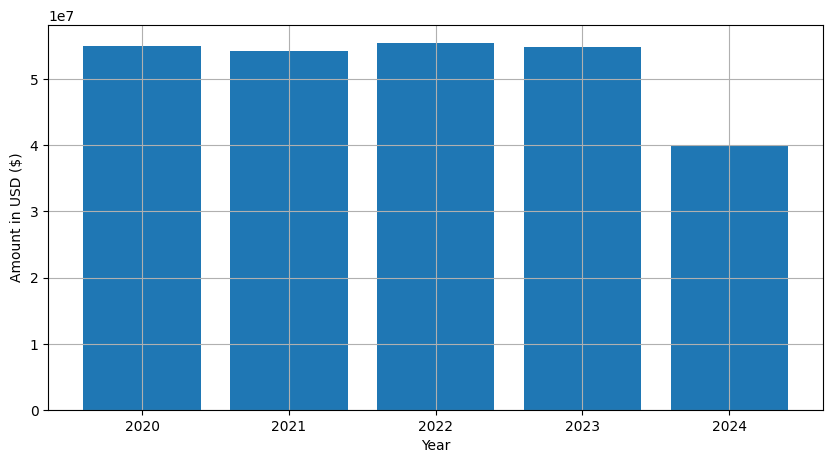

In [103]:
year = [Year for Year, df in df.groupby('Year')]
plt.figure(figsize=(10,5))
plt.bar(year, sum_year)
plt.xticks(year)
plt.ylabel('Amount in USD ($)')
plt.xlabel('Year')
plt.grid()
plt.show()

**The year 2022 recorded the highest revenue with a total of 55,466,655 USD, followed by 2020 in second place, 2023 in third place, and 2021 in fourth place. It can be concluded that the revenue calculated per year does not always increase; in fact, it fluctuates, resulting in varying total revenues.**

**The year 2024 is still the lowest because it has just entered early October, which is why the revenue appears very low compared to the income from previous years.**

# 3. Customer Tren

In [104]:
df['Payment_Method'].value_counts()

,count
Payment_Method,
Apple Pay,16751
Debit Card,16738
Cash,16692
Credit Card,16653
Google Pay,16613
PayPal,16553


In [105]:
# Grouping and saving it in a new DataFrame.
payments_per_year = df.groupby(['Year', 'Payment_Method']).size().reset_index(name='Number_of_Transaction_Methods')
payments_per_year

,Year,Payment_Method,Number_of_Transaction_Methods
0,2020,Apple Pay,3557
1,2020,Cash,3572
2,2020,Credit Card,3590
3,2020,Debit Card,3535
4,2020,Google Pay,3469
5,2020,PayPal,3468
6,2021,Apple Pay,3494
7,2021,Cash,3513
8,2021,Credit Card,3514
9,2021,Debit Card,3480


In [106]:
#Most common payment method each year.
max_payments_per_year = payments_per_year.loc[payments_per_year.groupby('Year')['Number_of_Transaction_Methods'].idxmax()]
max_payments_per_year

,Year,Payment_Method,Number_of_Transaction_Methods
2,2020,Credit Card,3590
8,2021,Credit Card,3514
12,2022,Apple Pay,3641
21,2023,Debit Card,3559
28,2024,Google Pay,2668


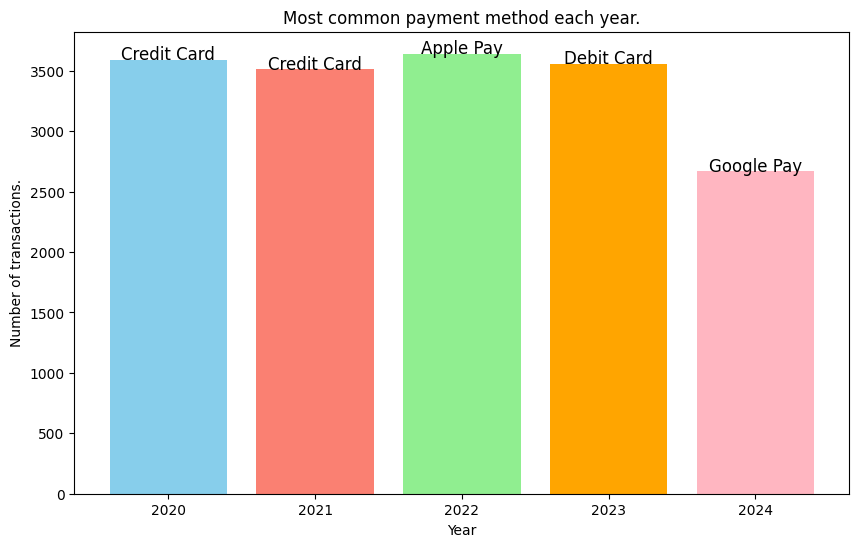

In [107]:
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightpink']

plt.figure(figsize=(10, 6))
plt.bar(max_payments_per_year['Year'], max_payments_per_year['Number_of_Transaction_Methods'], color=colors[:len(max_payments_per_year)])

# Tambahkan label dan judul
for i in range(len(max_payments_per_year)):
    plt.text(max_payments_per_year['Year'].iloc[i],
             max_payments_per_year['Number_of_Transaction_Methods'].iloc[i] + 0.5,
             max_payments_per_year['Payment_Method'].iloc[i],
             ha='center', fontsize=12)

plt.title('Most common payment method each year.')
plt.xlabel('Year')
plt.ylabel('Number of transactions.')
plt.xticks(max_payments_per_year['Year'])
plt.show()

**From 2020 to 2024, most customers used different payment methods. In 2020 and 2021, credit cards were the most commonly used payment method. Then, in 2022, there was a shift to Apple Pay. In 2023, customers switched again to debit cards, and so far in 2024, Google Pay has been the dominant payment method.**

In [108]:
df['Customer_Gender'].value_counts()

,count
Customer_Gender,
Female,50227
Male,49773


In [109]:
sales_by_gender = df.groupby('Customer_Gender')['Quantity'].sum()
sales_by_gender

,Quantity
Customer_Gender,
Female,150838
Male,148873


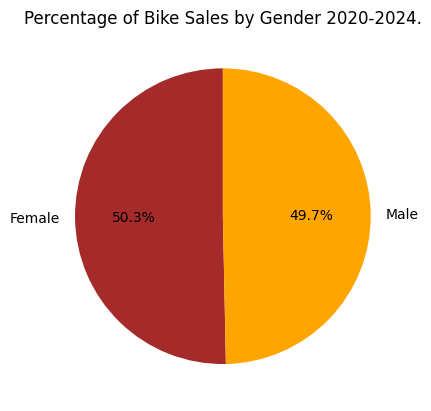

In [110]:
sales_by_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['brown', 'orange'])
plt.title('Percentage of Bike Sales by Gender 2020-2024.')
plt.ylabel('')
plt.show()

**As much as 50.3% of the customers are Female, based on the total number from 2020 to the ongoing year 2024.**

In [111]:
sales_by_gender_year = df.groupby(['Year', 'Customer_Gender'])['Quantity'].sum()
sales_by_gender_year

Year  Customer_Gender
2020  Female             31928
      Male               31535
2021  Female             32011
      Male               30932
2022  Female             32047
      Male               31433
2023  Female             31786
      Male               31605
2024  Female             23066
      Male               23368
Name: Quantity, dtype: int64

In [112]:
years = df['Year'].unique()
years

array([2022, 2024, 2021, 2020, 2023], dtype=int32)

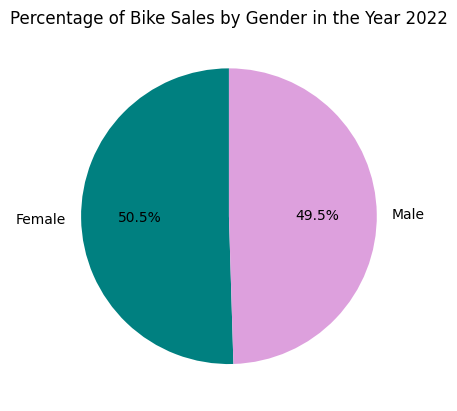

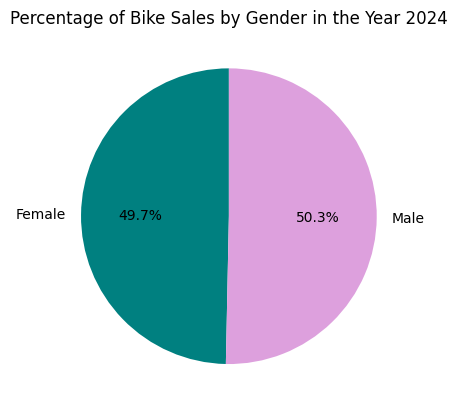

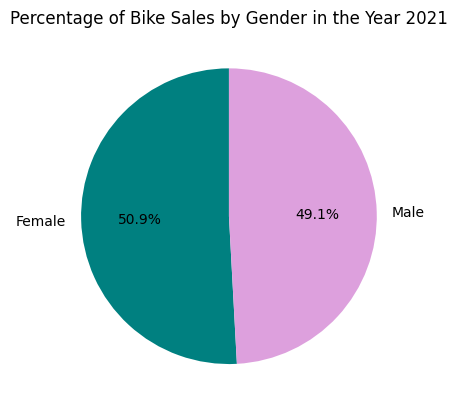

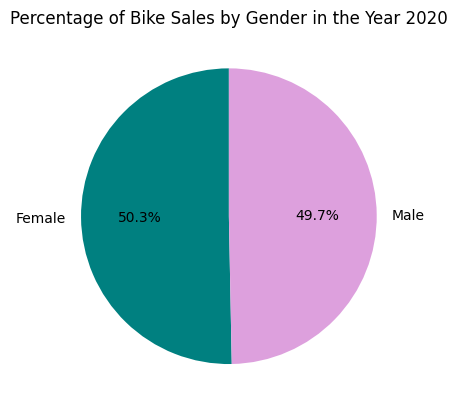

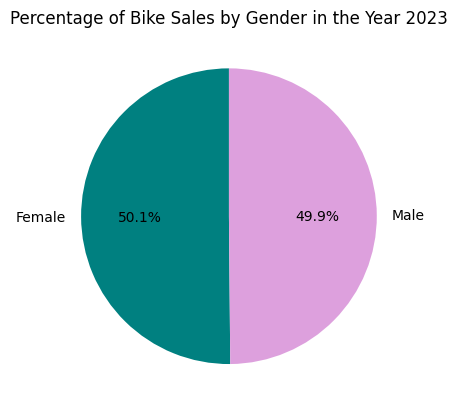

In [113]:

for year in years:
    # Filter data for a specific year.
    sales_by_gender = sales_by_gender_year[year]

    # Create pie chart
    plt.figure()
    sales_by_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['teal', 'plum'])
    plt.title(f'Percentage of Bike Sales by Gender in the Year {year}')
    plt.ylabel('')
    plt.show()
    plt.close()

**Annually, Female continue to dominate sales results; however, from January to the present month in 2024, Male have taken the lead, with a ratio of 50.3% to 49.7%.**

In [114]:
df['Age Group'] = df['Customer_Age'].apply(lambda x: 'Under 40' if x < 40 else 'Over 40')
df['Age Group'].value_counts()

,count
Age Group,
Over 40,58506
Under 40,41494


In [115]:
sales_by_age_group = df.groupby('Age Group')['Quantity'].sum()
sales_by_age_group

,Quantity
Age Group,
Over 40,175435
Under 40,124276


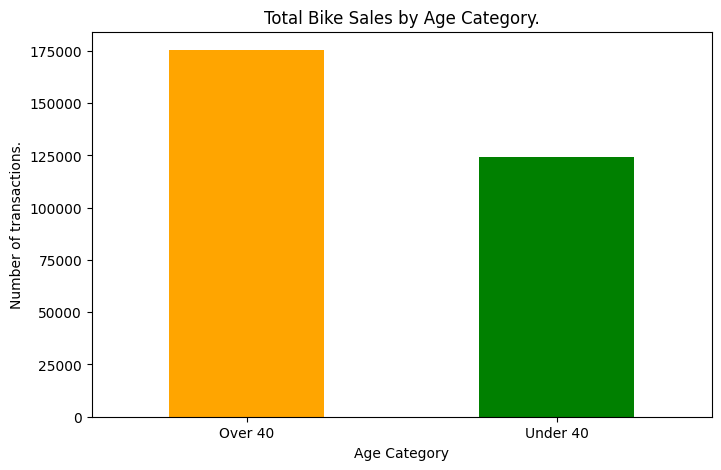

In [116]:
plt.figure(figsize=(8, 5))
sales_by_age_group.plot(kind='bar', color=['orange', 'green'])
plt.title('Total Bike Sales by Age Category.')
plt.xlabel('Age Category')
plt.ylabel('Number of transactions.')
plt.xticks(rotation=0)
plt.show()

**Throughout the years 2020 to 2024, customers aged over 40 made more purchases compared to those under 40.**